<a href="https://colab.research.google.com/github/rz-pb/CS-SBU-eDataMining-MSc-2022/blob/400422049/submits/400422049/project1/Exercise1_Dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset



## Context

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

## Content

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

# Getting Started
In this section first we are going to import modules and then set up the connections to the kaggle in order to have access to the datasets and importing them to the google colab environment. 

## Importing Modules

In [1]:
import pandas as pd
import numpy as np
from numpy import NaN

pd.__version__

'1.3.5'

## Installing the _kaggle_ Module
In order to have access to kaggle API for fetching the datasets, we need to install the kaggle module inside the environment using bash commmad python package installer **pip**.

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rezapourbahreini","key":"218f7736c63d979f4a9458061d870c49"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## Importing the **NYC Airbnb** Dataset
Using bash command `kaggle` we are willing to download the dataset.

In [5]:
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 110MB/s]


In [6]:
!pwd

/content


In [7]:
!ls

kaggle.json  name_gender.csv  new-york-city-airbnb-open-data.zip  sample_data


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('new-york-city-airbnb-open-data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [9]:
!ls

AB_NYC_2019.csv  name_gender.csv		     New_York_City_.png
kaggle.json	 new-york-city-airbnb-open-data.zip  sample_data


# 1. Reading the Dataset and Some Preliminary Checks
In this section, after reading the dataset, we are going to do some preliminary checks and take a look at the outlines of the dataset; such as the columns, size of dataset, data-types to see what can we do to optimize the dataset for what's coming next.

In [10]:
NYC = pd.read_csv('AB_NYC_2019.csv')

In [11]:
NYC.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [12]:
NYC.shape

(48895, 16)

In [13]:
NYC.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## Optimizing the Data-types : Any Candidates?
As you might notice, mostly the datatypes are set to `object`, whereas there are columns which could be revised in terms of datatype for better peformance and better readability. Following you may find the selected columns and the procedure of optimizing them in terms of datatypes. (Also the memory usage will do better after the changes) 

In [14]:
NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [15]:
NYC['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [16]:
NYC['neighbourhood_group'] = NYC['neighbourhood_group'].astype('category')
NYC['neighbourhood'] = NYC['neighbourhood'].astype('category')
NYC['room_type'] = NYC['room_type'].astype('category')
NYC['last_review'] = pd.to_datetime(NYC['last_review'])

In [17]:
NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  category      
 5   neighbourhood                   48895 non-null  category      
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  category      
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

## Handling Null Values
Null values is an evitable aspect of any real dataset. So it would be better if we accept the existance of null values and do some work to handle them in the best way so that we can cover these caveats and also enrich our dataset with some proper data instead.

Following you may find the same procedure in our dataset. First we need to have an aggregate report on how these null values are spreaded throughout the rows and columns. Then we need to choose the best approach based on the datatype to fill these values. 

In [18]:
# how null data is spreaded throughout the dataframe

NYC.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

First of all we can get rid of records with null values ( which are sparse ) in `name` and `host_name` safely:

In [19]:
NYC = NYC[~(NYC['name'].isna() | NYC['host_name'].isna())]

In [20]:
NYC.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

based on the concise report above, the data is an easy one! from the null-values point of view. Only in 2 columns:
```
last_review                       10037
reviews_per_month                 10037

```
we are facing some sort of null values crisis. Checking these columns, it's clear that the `last_review` nulls are somehow significant if there are 0 reviews for the record. accordingly null values in the `reviews_per_month` columns are also due to zero reviews for the record. So we can safely replace null values in `review_per_month` by zeros.

In [21]:
NYC['reviews_per_month'].fillna(0 , inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [22]:
NYC['reviews_per_month'].isnull().sum()

0

In [23]:
NYC.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Adding **Gender** feature to the Dataset
Using some pre-built name-gender datasets on the web, based on `host_name` field, one might want to add **gender** information as a new feature column to the dataset. It might come in handy if we are willing to infere some relations based on the `gender` of the hosts.  

### Gender Dataset : Case 1

In [24]:
male_names = pd.read_csv('https://media.geeksforgeeks.org/wp-content/uploads/male.txt', squeeze = True)
female_names = pd.read_csv('https://media.geeksforgeeks.org/wp-content/uploads/female.txt', squeeze = True)

In [25]:
names = pd.DataFrame({'male_names' : male_names , 'female_names' : female_names} )
names.head()

,male_names,female_names
0,Aaron,Abagail
1,Abbey,Abbe
2,Abbie,Abbey
3,Abbot,Abbi
4,Abbott,Abbie


In [26]:

def gender_detection(name):
  
  """
  This is a function to get the gender
  based on first-name 
  Using a gender-name dataset 

  Parameters
  ----------
  name : obj 
      the 1st param name `name`

  Returns
  -------
  string
      gender
  """

  if name in names['male_names'].values :
    return 'male'

  elif name in names['female_names'].values : 
    return 'female'

  else:
    return NaN



In [27]:
NYC['temp_gender'] = NYC['host_name'].apply(gender_detection)
NYC['temp_gender'] = NYC['temp_gender'].astype('category')

In [28]:
NYC.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'temp_gender'],
      dtype='object')

In [29]:
new_columns = ['id',
 'name',
 'host_id',
 'host_name',
 'temp_gender',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [30]:
NYC = NYC[new_columns]

In [31]:
NYC.head()

,id,name,host_id,host_name,temp_gender,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,male,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,female,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,female,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,NaN,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,female,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [32]:
NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   name                            48858 non-null  object        
 2   host_id                         48858 non-null  int64         
 3   host_name                       48858 non-null  object        
 4   temp_gender                     32836 non-null  category      
 5   neighbourhood_group             48858 non-null  category      
 6   neighbourhood                   48858 non-null  category      
 7   latitude                        48858 non-null  float64       
 8   longitude                       48858 non-null  float64       
 9   room_type                       48858 non-null  category      
 10  price                           48858 non-null  int64         
 11  mi

As you might notice we have added a new feature column as `temp_gender` to our dataset and changed its data-type to `category`.

But it's better to check if the name-gender correspondance is fairly complete or not by checking the number of null values in this new feature column :

In [33]:
NYC['temp_gender'].value_counts(dropna = False)/len(NYC)

male      0.362315
NaN       0.327930
female    0.309755
Name: temp_gender, dtype: float64

As it seems, unfortunately because our name-gender database was not a good resource, as a result we have quite many null values in the gender columns (~ 32.7% null results):
```
male      0.362315
NaN       0.327930
female    0.309755

```

 So we are going to check another resource with many more name-gender records in it, in the hope of better results:  

### Gender Dataset : Case 2
So in this section we are using another name-gender dataset with more than **95,000** records:



In [34]:
newnamegender = pd.read_csv('name_gender.csv',usecols=['name','gender'],dtype={'name':'object','gender':'category'})

In [35]:
newnamegender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95026 entries, 0 to 95025
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   name    95026 non-null  object  
 1   gender  95026 non-null  category
dtypes: category(1), object(1)
memory usage: 835.4+ KB


In [36]:
newnamegender.head()

,name,gender
0,Aaban,M
1,Aabha,F
2,Aabid,M
3,Aabriella,F
4,Aada,F


In [37]:
newmale = newnamegender['name'][newnamegender['gender']=='M']

In [38]:
newfemale = newnamegender['name'][newnamegender['gender']=='F']

In [39]:
def new_gender_detection(name):
  
  """
  This is a function to get the gender
  based on first-name 
  Using a gender-name dataset

  Parameters
  ----------
  name : obj 
      the 1st param name `name`

  Returns
  -------
  string
      gender
  """

  if name in newmale.values :
    return 'male'

  elif name in newfemale.values : 
    return 'female'

  else:
    return NaN

In [40]:
NYC['gender'] = NYC['host_name'].apply(new_gender_detection)
NYC['gender'] = NYC['gender'].fillna('unspecified')
NYC['gender'] = NYC['gender'].astype('category')

In [41]:
NYC[['host_name','temp_gender','gender']].isnull().sum()

host_name          0
temp_gender    16022
gender             0
dtype: int64

In [42]:
NYC[['host_name','temp_gender','gender']].sample(10)

,host_name,temp_gender,gender
19373,Darris,NaN,male
26368,Salome,female,female
14421,Rachel,female,female
35233,Nat,male,male
37649,Cady,NaN,female
29280,Chris,male,male
10380,Jonathan,male,male
12475,Cindy & Jeremy,NaN,unspecified
33408,Rebecca,female,female
32834,Rolf Arne,NaN,unspecified


In [43]:
NYC['gender'].value_counts(dropna = False)/len(NYC)

female         0.438086
male           0.388677
unspecified    0.173237
Name: gender, dtype: float64

As you might notice, using this new name-gender dataset , we were able to outperform the previous one ,in terms of non-null data.
```
female         0.438086
male           0.388677
unspecified    0.173237

```
Now there's only 17.3% unspecified gender in comparison with our last attempt which was 32.7% null gender data. So we are going to drop the `temp_gender` columns in favor of the newly-added `gender` feature column.

In [44]:
another_list_of_cols = ['id', 'name', 'host_id', 'host_name', 'gender', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']

In [45]:
NYC = NYC[another_list_of_cols]

## Host-type : Are they individuals, couples or institutes?
Actually it came into my mind to check if I can retrieve more information about host-types using some keyword pattern search inside `host_name` string to answer this question: Are they individuals, couples or institutes?

So I created 3 different masks based on keywords that I thought may indicate different categories for us: _individuals, couples and institues_ and then add a new column for `host_type` and filling it up using these masks according to the `host_name` feature column.

In [46]:
institute_mask = (NYC['host_name'].str.contains("The ").astype('bool') | NYC['host_name'].str.contains("Hotel").astype('bool'))
couple_mask = ((NYC['host_name'].str.contains(" And ")).astype('bool') | (NYC['host_name'].str.contains("&")).astype('bool') | (NYC['host_name'].str.contains(" Et ")).astype('bool'))
individual_mask = (~ (couple_mask | institute_mask))

In [47]:
NYC['host_type']=NaN

NYC.loc[institute_mask,'host_type'] = 'institute'
NYC.loc[couple_mask,'host_type'] = 'couple'
NYC.loc[individual_mask,'host_type'] = 'individual'

NYC['host_type']=NYC['host_type'].astype('category')

In [48]:
another_list_of_cols = ['id', 'name', 'host_id', 'host_name', 'gender', 'host_type' , 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']

In [49]:
NYC = NYC[another_list_of_cols]

In [50]:
NYC.sample(5)

,id,name,host_id,host_name,gender,host_type,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23267,18840866,Private Room with Private Bath Upper East Side,19424541,Barbara,female,individual,Manhattan,Upper East Side,40.76749,-73.96246,Private room,190,1,15,2019-05-24,0.68,2,63
3688,2221852,Sunny Room in Beautiful Artist's Home,12190039,Lyndell,male,individual,Manhattan,Washington Heights,40.83426,-73.94758,Private room,55,2,17,2018-10-22,0.27,2,34
11151,8631355,One Bedroom Available in 2BR APT,19480603,Michele,female,individual,Brooklyn,Crown Heights,40.67589,-73.95196,Private room,80,5,2,2016-07-31,0.04,1,0
23537,19054683,Fully-furnished modern apartment,97907084,Kim,female,individual,Bronx,Wakefield,40.90281,-73.85201,Entire home/apt,28,1,0,NaT,0.00,1,0
19146,15223434,new sunshine room in chinatown train F is around,89386217,Na,female,individual,Manhattan,Chinatown,40.71350,-73.99121,Private room,75,1,318,2019-06-19,9.39,1,51


In [51]:
NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   name                            48858 non-null  object        
 2   host_id                         48858 non-null  int64         
 3   host_name                       48858 non-null  object        
 4   gender                          48858 non-null  category      
 5   host_type                       48858 non-null  category      
 6   neighbourhood_group             48858 non-null  category      
 7   neighbourhood                   48858 non-null  category      
 8   latitude                        48858 non-null  float64       
 9   longitude                       48858 non-null  float64       
 10  room_type                       48858 non-null  category      
 11  pr

In [52]:
NYC.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
gender                                0
host_type                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Some Final Thoughts about Clearing the Dataset

Beside optimizing datatypes and handling null values, there are other aspects that we need to take care of, if we want to do data science:

### Irrelevant Unhelpful Columns : Get Rid of Them!

There are always some internal codes or indices that will lose their significance as an independent data. _IDs_ or _row numbers_ are among those. We can drop them safely:

In [53]:
NYC.drop('id', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Ethical Considerations

Besides any technicalities that must be addressed in the data science context, ethical considerations also are of great importance. If there's any personal information which needs someone's consent for analysis, it's better to put them aside very early in the process:
`host_name` here might be one of those!

In [54]:
NYC.drop('host_name', axis=1, inplace=True)

In [55]:
NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            48858 non-null  object        
 1   host_id                         48858 non-null  int64         
 2   gender                          48858 non-null  category      
 3   host_type                       48858 non-null  category      
 4   neighbourhood_group             48858 non-null  category      
 5   neighbourhood                   48858 non-null  category      
 6   latitude                        48858 non-null  float64       
 7   longitude                       48858 non-null  float64       
 8   room_type                       48858 non-null  category      
 9   price                           48858 non-null  int64         
 10  minimum_nights                  48858 non-null  int64         
 11  nu

In [56]:
NYC.corr()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.020193,0.127198,0.015328,-0.017027,-0.140273,0.209644,0.154954,0.203743
latitude,0.020193,1.000000,0.084819,0.033944,0.025893,-0.015198,-0.018702,0.019548,-0.010775
longitude,0.127198,0.084819,1.000000,-0.149954,-0.062893,0.059151,0.138759,-0.114746,0.082754
price,0.015328,0.033944,-0.149954,1.000000,0.042804,-0.047949,-0.050586,0.057460,0.081817
minimum_nights,-0.017027,0.025893,-0.062893,0.042804,1.000000,-0.081610,-0.127378,0.131313,0.145953
number_of_reviews,-0.140273,-0.015198,0.059151,-0.047949,-0.081610,1.000000,0.589221,-0.072408,0.171855
reviews_per_month,0.209644,-0.018702,0.138759,-0.050586,-0.127378,0.589221,1.000000,-0.047366,0.163751
calculated_host_listings_count,0.154954,0.019548,-0.114746,0.057460,0.131313,-0.072408,-0.047366,1.000000,0.225784
availability_365,0.203743,-0.010775,0.082754,0.081817,0.145953,0.171855,0.163751,0.225784,1.000000


## Handling Outliers

Outliers are records which have some anomalies in their values in comparison with some criteria, mostly from a statistical point of view.

There are different methods on how to handle outliers and it's better to apply each method according to the nature of dataset.

In [57]:
for cols in NYC.columns:
  if cols != 'host_id' :
    if NYC[cols].dtype == 'int64' or NYC[cols].dtype == 'float64':
        upper_range = NYC[cols].mean() + 3 * NYC[cols].std()
        lower_range = NYC[cols].mean() - 3 * NYC[cols].std()
        
        indexs = NYC[(NYC[cols] > upper_range) | (NYC[cols] < lower_range)].index
        NYC = NYC.drop(indexs)

In [58]:
NYC.shape

(44090, 16)

In [59]:
NYC.head()

,name,host_id,gender,host_type,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,male,individual,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,female,individual,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,female,individual,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365
4,Entire Apt: Spacious Studio/Loft by central park,7192,female,individual,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,male,individual,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


### Recalculation of "calculated_host_listings_count"
Caution! The values in this column shoud be calculated again because of its dependencies on other records that might have been omitted.

In [60]:
NYC['calculated_host_listings_count'] = NYC['host_id'].apply(lambda x : len(NYC['host_id'][NYC['host_id']==x]))

# 2. Aggregate information 
Aggregate data refers to numerical or non-numerical information that is collected from multiple sources and/or on multiple measures, variables, or individuals and compiled into data summaries or summary reports, typically for the purposes of public reporting or statistical analysis.

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Total number of Ads

In [62]:
len(NYC)

44090

## Number of Ads by neighbourhood_group Categories

In [63]:
NYC['neighbourhood_group'].value_counts()

Manhattan        19635
Brooklyn         19055
Queens            4278
Bronx              954
Staten Island      168
Name: neighbourhood_group, dtype: int64

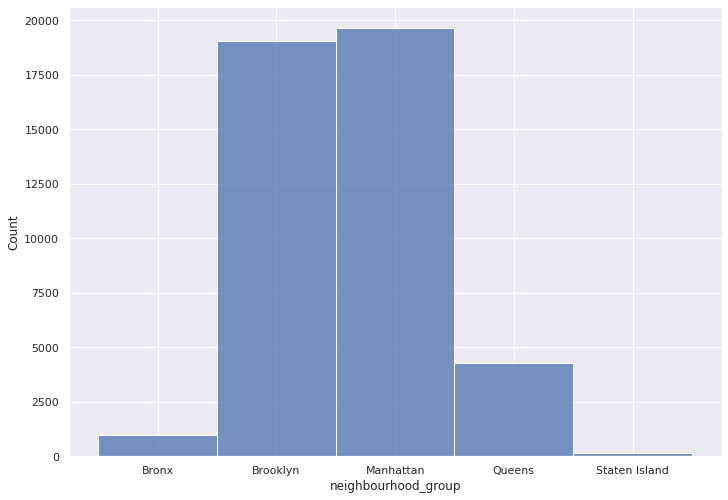

In [64]:
sns.histplot(NYC['neighbourhood_group'])
plt.show()

## Price Statistical Measures

In [65]:
NYC['price'].describe()

count    44090.000000
mean       138.792334
std        107.936585
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max        860.000000
Name: price, dtype: float64

In [66]:
NYC['price'].mode()[0]

150

In [67]:
NYC['price'].median()

105.0

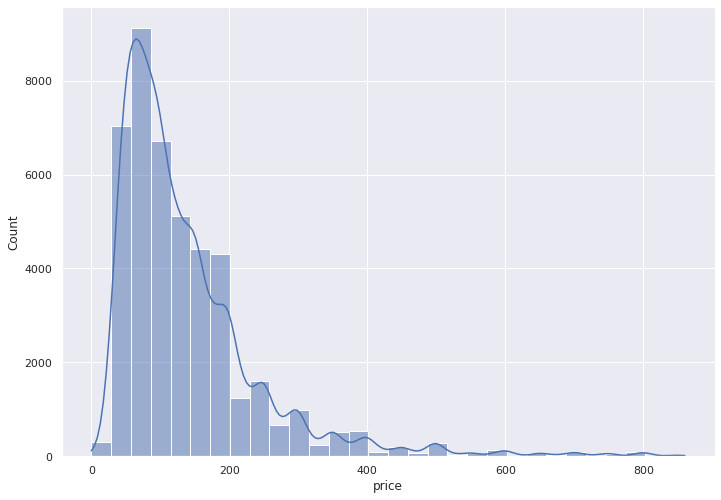

In [68]:
sns.histplot(data=NYC, x="price", kde=True , bins = 30)

## Number of Ads for Each Unique Host

Number of unique `host_id`s in dataset:

In [69]:
NYC['host_id'].nunique()

34807

In [70]:
NYC['host_id'].value_counts()

137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
            ... 
5346314        1
6707228        1
69944410       1
33816358       1
68119814       1
Name: host_id, Length: 34807, dtype: int64

In [71]:
NYC['host_id'].value_counts().describe()

count    34807.000000
mean         1.266699
std          1.740087
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        103.000000
Name: host_id, dtype: float64

In [72]:
NYC['host_id'].value_counts().median()

1.0

In [73]:
NYC['host_id'].value_counts().mode()[0]

1

As you might already noticed, number of ads for each unique host has an **extremely skewed distribution** towards 1 ad per host as the _mean_, _median_ and _mode_ are indicating clearly. A distribution is said to be skewed when the data points cluster more toward one side of the scale than the other. 

Therefore any distribution plot would be extremely disproportionate and gives little insight visually.

despite I tried to plot with a log scale y-axis to keep it more descriptive.

Text(0.5, 0, 'Number of Listings for Each Host frequency')

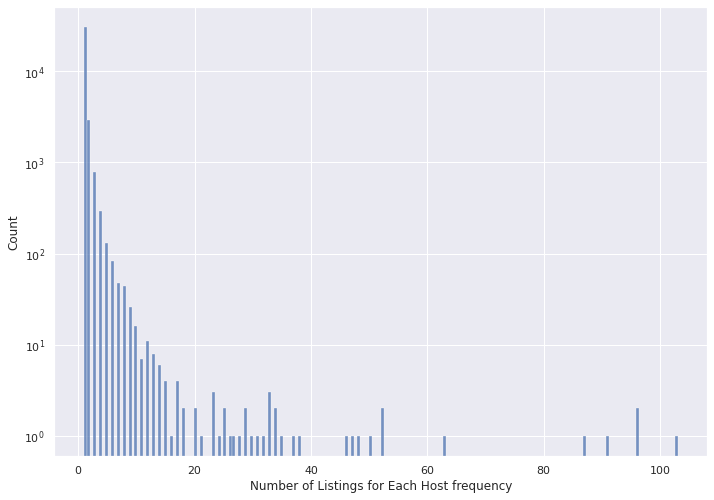

In [74]:
g = sns.histplot(NYC['host_id'].value_counts(),bins = 200)
g.set_yscale("log")
g.set_xlabel('Number of Listings for Each Host frequency')

## Number of Properties for Each Unique Host
If we are going to find the number of properties (not listings!) for each unique host, it requires to know what differentiates properties with eachother. I couldn't come to a conclusion that spatial coordinates can give us this criteria.

In [80]:
NYC[['host_id', 'latitude', 'longitude', 'room_type']].loc[NYC['latitude']==40.70738].head(90)

,host_id,latitude,longitude,room_type
1874,4356301,40.70738,-73.92213,Private room
23069,10477693,40.70738,-74.01281,Entire home/apt
30637,12243051,40.70738,-74.00493,Entire home/apt


## Most Reviewed Listings

In [102]:
NYC['number_of_reviews'].nlargest(10)

129     155
152     155
1066    155
1949    155
2418    155
2572    155
4280    155
7040    155
7578    155
9156    155
Name: number_of_reviews, dtype: int64

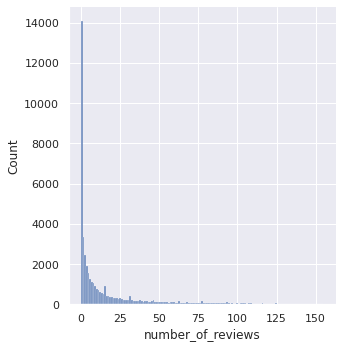

In [100]:
sns.displot(data = NYC , x = 'number_of_reviews')

## Hosts with the Most Total Reviewed Listings

In [90]:
top_reviewed_hosts = pd.DataFrame(NYC.groupby('host_id')['number_of_reviews'].sum().nlargest(10))
top_reviewed_hosts.reset_index(inplace = True)
top_reviewed_hosts['host_id']  = top_reviewed_hosts['host_id'].astype('category')

In [91]:
top_reviewed_hosts

,host_id,number_of_reviews
0,6885157,1184
1,417504,935
2,16677326,818
3,31304940,818
4,17555570,805
5,17638424,756
6,65809485,752
7,22384027,744
8,45416627,727
9,69427329,692


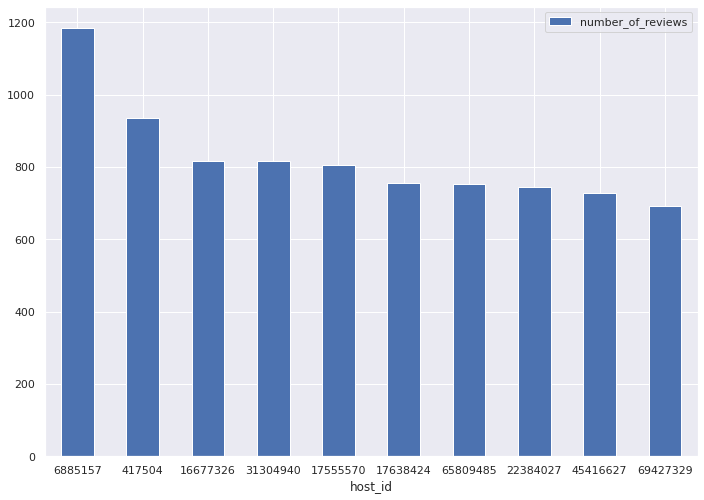

In [92]:
top_reviewed_hosts.plot.bar(x='host_id',y='number_of_reviews', rot=0)